In [2]:
import pandas as pd
import numpy as np

In [50]:
df_train = pd.read_csv("./../data/train.csv").dropna()
df_test_nolabel = pd.read_csv("./../data/test_nolabel.csv").dropna()
df_sample_submission = pd.read_csv("./../data/sample_submission.csv").dropna()

/var/folders/9r/sd92rccj2_xbk8nkg4v7dcm00000gn/T/ipykernel_31833/1399654736.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./../data/train.csv").dropna()


In [51]:
df_test_nolabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 0 to 7049
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6990 non-null   object 
 1   LoanNr_ChkDgt      6990 non-null   int64  
 2   Name               6990 non-null   object 
 3   City               6990 non-null   object 
 4   State              6990 non-null   object 
 5   Bank               6990 non-null   object 
 6   BankState          6990 non-null   object 
 7   ApprovalDate       6990 non-null   object 
 8   ApprovalFY         6990 non-null   object 
 9   NoEmp              6990 non-null   int64  
 10  NewExist           6990 non-null   float64
 11  CreateJob          6990 non-null   int64  
 12  RetainedJob        6990 non-null   int64  
 13  FranchiseCode      6990 non-null   int64  
 14  UrbanRural         6990 non-null   int64  
 15  RevLineCr          6990 non-null   object 
 16  LowDoc             6990 

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40009 entries, 0 to 40384
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40009 non-null  object 
 1   LoanNr_ChkDgt      40009 non-null  int64  
 2   Name               40009 non-null  object 
 3   City               40009 non-null  object 
 4   State              40009 non-null  object 
 5   Bank               40009 non-null  object 
 6   BankState          40009 non-null  object 
 7   ApprovalDate       40009 non-null  object 
 8   ApprovalFY         40009 non-null  object 
 9   NoEmp              40009 non-null  int64  
 10  NewExist           40009 non-null  float64
 11  CreateJob          40009 non-null  int64  
 12  RetainedJob        40009 non-null  int64  
 13  FranchiseCode      40009 non-null  int64  
 14  UrbanRural         40009 non-null  int64  
 15  RevLineCr          40009 non-null  object 
 16  LowDoc             400

In [53]:

df_train['Name'] = df_train['Name'].apply(lambda str: str.lower())
df_train['City'] = df_train['City'].apply(lambda str: str.lower())
df_train['Bank'] = df_train['Bank'].apply(lambda str: str.lower())
df_train['BankState'] = df_train['BankState'].apply(lambda str: str.lower())

df_train['NoEmp'] = df_train['NoEmp'].clip(0, 155)
df_train['CreateJob'] = df_train['CreateJob'].clip(0, 1027)

df_train.loc[df_train['NewExist'] == 0, "NewExist"] = 1

df_train.loc[df_train['FranchiseCode'] <= 1, "FranchiseCode"] = 0
df_train.loc[df_train['FranchiseCode'] > 1, "FranchiseCode"] = 1

df_train.loc[df_train['RevLineCr'].isin(["N", 0]), "RevLineCr"] = 0
df_train.loc[~df_train['RevLineCr'].isin(["N", 0]), "RevLineCr"] = 1

df_train.loc[df_train['LowDoc'].isin(["Y", "S"]), "LowDoc"] = 1
df_train.loc[~df_train['LowDoc'].isin(["Y", "S"]), "LowDoc"] = 0

df_train["DisbursementGross"] = df_train["DisbursementGross"]\
        .str.extract("(\d+(?:,\d+)*(?:\.\d+)?)")[0]\
        .str.replace(",", "")\
        .astype("float")

#df_train['ApprovalFY'] = df_train['ApprovalFY'].astype(np.int64)
df_train['RevLineCr'] = df_train['RevLineCr'].astype(np.int64)
df_train['LowDoc'] = df_train['LowDoc'].astype(np.int64)

df_train_accept = df_train["Accept"]
df_train.drop(['Name', 'Bank', 'BankState', 'State', 'City', 'id', 'LoanNr_ChkDgt', 'ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'BalanceGross', "Accept"], axis=1, inplace=True)

#one_hot = pd.get_dummies(df_train['Name'])
#df_train = df_train.drop('Name',axis = 1)
#df_train = df_train.join(one_hot)

#one_hot2 = pd.get_dummies(df_train['Bank'])
#df_train = df_train.drop('Bank',axis = 1)
#df_train = df_train.join(one_hot2)

#one_hot3 = pd.get_dummies(df_train['City'])
#df_train = df_train.drop('City',axis = 1)
#df_train = df_train.join(one_hot3, lsuffix='city')

#one_hot4 = pd.get_dummies(df_train['BankState'])
#df_train = df_train.drop('BankState',axis = 1)
#df_train = df_train.join(one_hot4)

df_train.dtypes

NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr              int64
LowDoc                 int64
DisbursementGross    float64
dtype: object

In [54]:
df_test_nolabel = df_test_nolabel.merge(df_sample_submission)
df_test_nolabel.head

<bound method NDFrame.head of                id  LoanNr_ChkDgt                            Name  \
0     63ef5dfc62f     1787644007                   ERIC P. HAILE   
1     65ee0569c05     6209123009               TANNING BED, LTD.   
2     19058f4da52     5033174010   BREITO COMPUTER SOLUTIONS INC   
3     a0f1299afe4     1578685008          Rasol Food Corporation   
4     e47da0be9fc     7146054004   MCKAY ARCHITECTURE AND DESIGN   
...           ...            ...                             ...   
6985  78c2f0067d8     5583904009            NASCO STONEWORKS INC   
6986  279c7d23eb7     3264695007                Yaworski's, Inc.   
6987  d67af0ec109     1890735004  RAWSON VALLEY FARMS LANDSCAPES   
6988  7d2e8114e9a     8939464003               RAJ REALTY PA LLC   
6989  f479ed04b66     1527695000                  Heather Adelle   

                                City State                            Bank  \
0                           STAFFORD    NY   MANUFACTURERS & TRADERS TR CO 

In [55]:

df_test_nolabel['Name'] = df_test_nolabel['Name'].apply(lambda str: str.lower())
df_test_nolabel['City'] = df_test_nolabel['City'].apply(lambda str: str.lower())
df_test_nolabel['Bank'] = df_test_nolabel['Bank'].apply(lambda str: str.lower())
df_test_nolabel['BankState'] = df_test_nolabel['BankState'].apply(lambda str: str.lower())

df_test_nolabel['NoEmp'] = df_test_nolabel['NoEmp'].clip(0, 155)
df_test_nolabel['CreateJob'] = df_test_nolabel['CreateJob'].clip(0, 1027)

df_test_nolabel.loc[df_test_nolabel['NewExist'] == 0, "NewExist"] = 1

df_test_nolabel.loc[df_test_nolabel['FranchiseCode'] <= 1, "FranchiseCode"] = 0
df_test_nolabel.loc[df_test_nolabel['FranchiseCode'] > 1, "FranchiseCode"] = 1

df_test_nolabel.loc[df_test_nolabel['RevLineCr'].isin(["N", 0]), "RevLineCr"] = 0
df_test_nolabel.loc[~df_test_nolabel['RevLineCr'].isin(["N", 0]), "RevLineCr"] = 1

df_test_nolabel.loc[df_test_nolabel['LowDoc'].isin(["Y", "S"]), "LowDoc"] = 1
df_test_nolabel.loc[~df_test_nolabel['LowDoc'].isin(["Y", "S"]), "LowDoc"] = 0

df_test_nolabel["DisbursementGross"] = df_test_nolabel["DisbursementGross"]\
        .str.extract("(\d+(?:,\d+)*(?:\.\d+)?)")[0]\
        .str.replace(",", "")\
        .astype("float")

#df_train['ApprovalFY'] = df_train['ApprovalFY'].astype(np.int64)
df_test_nolabel['RevLineCr'] = df_test_nolabel['RevLineCr'].astype(np.int64)
df_test_nolabel['LowDoc'] = df_test_nolabel['LowDoc'].astype(np.int64)

df_test_nolabel_accept = df_test_nolabel["Accept"]
df_test_nolabel.drop(['Name', 'Bank', 'BankState', 'State', 'City', 'id', 'LoanNr_ChkDgt', 'ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'BalanceGross', "Accept"], axis=1, inplace=True)

#one_hot = pd.get_dummies(df_test_nolabel['Name'])
#df_test_nolabel = df_test_nolabel.drop('Name',axis = 1)
#df_test_nolabel = df_test_nolabel.join(one_hot)

#one_hot2 = pd.get_dummies(df_test_nolabel['Bank'])
#df_test_nolabel = df_test_nolabel.drop('Bank',axis = 1)
#df_test_nolabel = df_test_nolabel.join(one_hot2)

#one_hot3 = pd.get_dummies(df_train['City'])
#df_train = df_train.drop('City',axis = 1)
#df_train = df_train.join(one_hot3, lsuffix='city')

#one_hot4 = pd.get_dummies(df_test_nolabel['BankState'])
#df_test_nolabel = df_test_nolabel.drop('BankState',axis = 1)
#df_test_nolabel = df_test_nolabel.join(one_hot4)

df_test_nolabel.dtypes

NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr              int64
LowDoc                 int64
DisbursementGross    float64
dtype: object

In [56]:
df_test_nolabel

,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross
0,1,2.0,0,0,0,0,0,0,35000.0
1,81,1.0,0,0,0,0,0,0,145000.0
2,4,1.0,1,5,0,1,1,0,52174.0
3,6,2.0,3,6,0,1,1,0,194316.0
4,3,1.0,0,3,0,1,1,0,75000.0
...,...,...,...,...,...,...,...,...,...
6985,2,1.0,0,2,0,1,1,0,30000.0
6986,5,2.0,0,5,0,1,0,0,18.0
6987,1,1.0,0,1,0,2,1,0,23762.0
6988,2,1.0,0,2,0,1,1,0,30000.0


In [61]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_train)
X_train = scaler.transform(df_train)
X_test = scaler.transform(df_test_nolabel)
Y_train = df_train_accept.values
Y_test = df_test_nolabel_accept.values

In [62]:
X_train

array([[ 0.70352467, -0.62339618, -0.09589763, ..., -1.13856596,
         0.        ,  0.93089489],
       [-0.3694442 , -0.62339618, -0.04717429, ..., -1.13856596,
         0.        , -0.51378835],
       [-0.24321256, -0.62339618, -0.09589763, ...,  0.87829782,
         0.        , -0.44499391],
       ...,
       [-0.49567583,  1.60411634, -0.09589763, ..., -1.13856596,
         0.        , -0.55965131],
       [-0.49567583,  1.60411634, -0.09589763, ...,  0.87829782,
         0.        , -0.33784428],
       [-0.3694442 , -0.62339618, -0.09589763, ...,  0.87829782,
         0.        , -0.44499391]])

In [63]:
# empezar a entrenar aquí

In [64]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# configuramos k a 15 inicialmente
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
from sklearn import metrics

# vemos qué de acierto tiene con el fragmento del dataset para testeado
Y_test_pred = model.predict(X_test)
print(Y_test_pred)
print("Accuracy in testing ", metrics.accuracy_score(Y_test, Y_test_pred))

[1 1 1 ... 1 1 1]
Accuracy in testing  0.5021459227467812


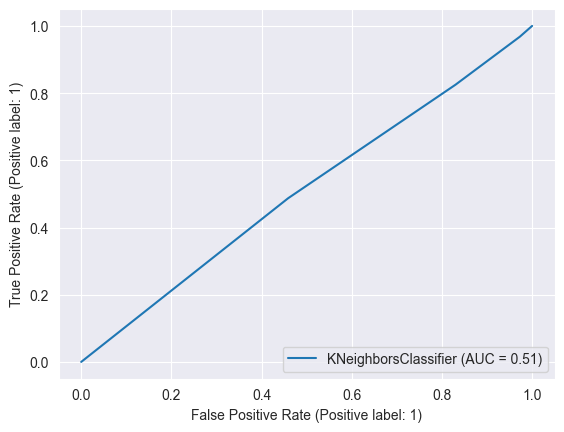

In [66]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, Y_test)